In [19]:
import pandas as pd
import geo_boundary
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
import geoplot

In [2]:
data_path = "/Users/creative/Documents/python/Point of interesting/商业POI/shopping_mall.xlsx"

In [3]:
df = pd.read_excel(data_path)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lng, df.lat))
gdf.crs = 'EPSG:4326'
gdf = gdf[~gdf['floor'].isin(["[]"])]

In [57]:
data_list = ['d4c2b0f11ef8bfca4bcc4a75','bd074d2823cfb7b5a7c75632','004c43c1faaa989d50e5c55f','8a11388957967ee7220220c7','22e11407be87d4add5b74e52']
boundary = geo_boundary.main(data_list)

In [58]:
"""利用geopandas点转线的函数"""
def point_to_Polygon(df,num):
    from shapely.geometry import LineString,Point,Polygon
    dataGroup = df.groupby(num) #分组

    #构造数据
    tb = []
    geomList = []
    for name,group in dataGroup:
        # 分离出属性信息，取每组的第1行前5列作为数据属性
        tb.append(group.iloc[0,:5])
        # 把同一组的点打包到一个list中
        xyList = [xy for xy in zip(group.x, group.y)]

        line = LineString(xyList)
        #3line = Polygon(line)
        geomList.append(line)

    # 点转线
    geoDataFrame = gpd.GeoDataFrame(tb, geometry = geomList)
    return geoDataFrame


In [59]:
boundary = point_to_Polygon(boundary,"uid")
boundary.crs = 'EPSG:4326'

<AxesSubplot:>

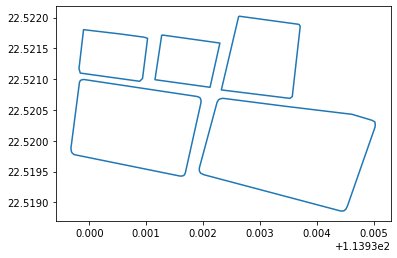

In [60]:
boundary = boundary.to_crs("EPSG:4326")
boundary.plot()

<GeoAxesSubplot:>

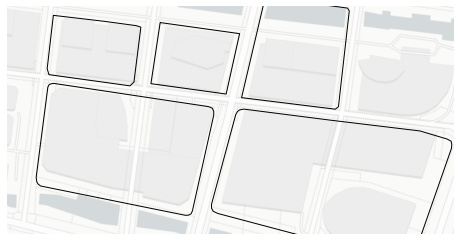

In [95]:
ax = geoplot.polyplot(df=boundary,projection=geoplot.crs.WebMercator(), zorder=2)
#ax = geoplot.kdeplot(df=gdf, clip=boundary.geometry,shade=True, cmap='Reds',projection=geoplot.crs.WebMercator())
geoplot.webmap(df=gdf,extent=None,  zoom=18, provider={'attribution': '(C) OpenStreetMap contributors', 'max_zoom': 19, 'name': 'OpenStreetMap.Mapnik', 'url': 'https://d.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}.png'},ax=ax, zorder=1)


<GeoAxesSubplot:>

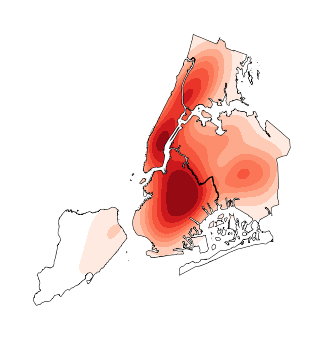

In [24]:
import geopandas
import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)

ax = geoplot.kdeplot(
    collisions.head(1000), clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax=ax, zorder=1)

In [25]:
collisions.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich